<a href="https://colab.research.google.com/github/ParthikB/Udacity--Tensorflow/blob/master/MNIST_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

tf.enable_eager_execution()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Loading and Preprocessing Data

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset['train'], dataset['test']

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal",      "Shirt",   "Sneaker",  "Bag",   "Ankle Boot"]

In [0]:
m_train = metadata.splits['train'].num_examples
m_test  = metadata.splits['test'].num_examples

In [0]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_data = train_data.map(normalize)
test_data  = test_data.map(normalize)

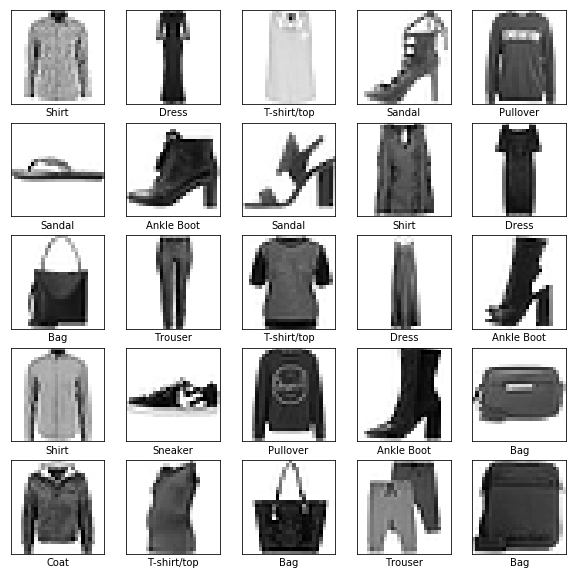

In [33]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

### Creating and Compiling the Network

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

### Creating Mini-Batch

In [0]:
BATCH_SIZE = 32
train_data = train_data.repeat().shuffle(m_train).batch(BATCH_SIZE)
test_data  = test_data.batch(BATCH_SIZE)

### Model Fitting

In [37]:
model.fit(train_data, epochs=5, 
          steps_per_epoch=math.ceil(m_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4950 - acc: 0.8259
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3663 - acc: 0.8684
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3322 - acc: 0.8787
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3130 - acc: 0.8856
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2940 - acc: 0.8915


### Testing Data

In [39]:
test_loss, test_accuracy = model.evaluate(test_data, 
                                          steps=math.ceil(m_test/BATCH_SIZE))
print("Test Accuracy :",test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3481 - acc: 0.8729
Test Accuracy : 0.8729
